In [1]:
# Notebok Pre-Set Script: 
# This section will contain all the necessary libraries and 
# initial data frames for the analysis.
import numpy as np

import pandas as pd
from pandas import Series, DataFrame

import pyarrow as pa
import pyarrow.parquet as pq

from src.d06_reporting.VennAnalysisReport import venn_analysis_table
from src.d06_reporting.VennAnalysisReport import venn_analysis_diagram
from src.d06_reporting.VennAnalysisReport import venn_analysis_short_test
                                                 
%matplotlib inline

df_pat = pq.read_table('../data/01_raw/20210225-ems-v04-patients-raw.parquet')\
           .to_pandas(categories=['FireStation','Battalion'])
df_pro = pq.read_table('../data/01_raw/20210225-ems-v04-procedures-raw.parquet')\
           .to_pandas(categories=['Procedure_Performed_Code'])
df_med = pq.read_table('../data/01_raw/20210225-ems-v04-medications-raw.parquet')\
           .to_pandas(categories=['Medication_Given_RXCUI_Code'])

# Venn Analysis
The purpose of this section is to better understand where does the the PatientId should exist from the subject matter expert point of view.

The original assumption is that all patients and providers should exist in the 3 datasets. However, we are seeing that the presents of certain patients and providers are present in the procedures and medications datasets but not in the patients dataset.

To better represent this findings we will provide a venn diagram and the observations made for each ID.

### Patient IDs

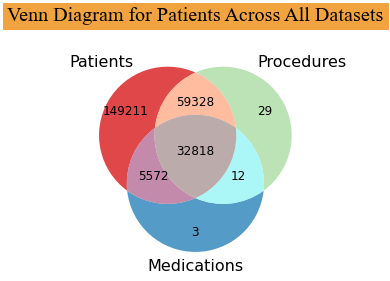

In [2]:
venn_analysis_diagram('PatientId',
                    df_pat['PatientId'],
                    df_pro['PatientId'],
                    df_med['PatientId'])

In [3]:
venn_analysis_table('PatientId',
                    df_pat['PatientId'],
                    df_pro['PatientId'],
                    df_med['PatientId'])

,Count
Observations,
Patients that only exist in Patients,149211
Patients that only exist in the Procedures but not in Patients (?),29
Patients that exist in Patients and Procedures,59328
Patients that only exists in the Medications but not in Patients (?),3
Patients that exists in Patients and Medications,5572
Patients that exists in Procedures and Medications only but not in Patients (?),12
Patients that exists in all datasets,32818


#### Set of Patient IDs on Providers and Medications Datasets but NOT in Patients

In [4]:
pat_miss_id = venn_analysis_table('PatientId',
                                  df_pat['PatientId'],
                                  df_pro['PatientId'],
                                  df_med['PatientId'],False)

print('Total Number of PatientIds not in Patients Dataset is {}'\
     .format(pat_miss_id.shape[0]))

pat_miss_id.head()

Total Number of PatientIds not in Patients Dataset is 44


,Missing IDs
0,1465241
1,1465386
2,1465443
3,1465415
4,1465256


### Patient IDs Quick Test
**Test Description** <br />
The script that follows will search for each **PatientId** that was shown in the Venn Diagram to not exist in the Patients table and generate a report that will help us validate the findings shown by the Venn analysis.

**Pass Fail Criteria**<br />
The shape of the patients data frame will be evaluated after applying the **logical indexing** that results from searching the PatientId within the Patients Raw dataset. If resulting shape is equal to (0,12) the test for that individual PatientId will be marked as 'PASS' as it implies the **PatientId** was not found on the DataFrame.

In [5]:
venn_analysis_short_test('PatientId', df_pat, pat_miss_id).head()

The total number patient IDs with failed status is 0


,PatientId,Raw Shape,Logical Index Shape,Pass/Fail
0,1465241,"(543774, 12)","(0, 12)",PASS
1,1465386,"(543774, 12)","(0, 12)",PASS
2,1465443,"(543774, 12)","(0, 12)",PASS
3,1465415,"(543774, 12)","(0, 12)",PASS
4,1465256,"(543774, 12)","(0, 12)",PASS


### Provider IDs

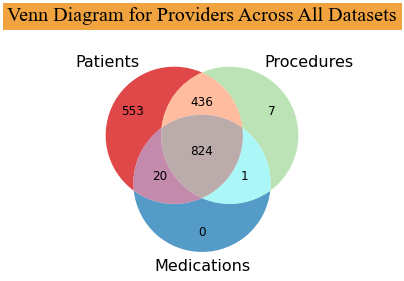

In [6]:
venn_analysis_diagram('FRDPersonnelID',
                    df_pat['FRDPersonnelID'],
                    df_pro['FRDPersonnelID'],
                    df_med['FRDPersonnelID'])

In [7]:
venn_analysis_table('FRDPersonnelID',
                    df_pat['FRDPersonnelID'],
                    df_pro['FRDPersonnelID'],
                    df_med['FRDPersonnelID'])

,Count
Observations,
Providers that only exist in Patients,553
Providers that only exist in the Procedures but not in Patients (?),7
Providers that exist in Patients and Procedures,436
Providers that only exists in the Medications but not in Patients (?),0
Providers that exists in Patients and Medications,20
Providers that exists in Procedures and Medications only but not in Patients (?),1
Providers that exists in all datasets,824


#### Set of Provider IDs on Providers and Medications Datasets but NOT in Patients

In [8]:
pro_miss_id = venn_analysis_table('FRDPersonnelID',
                                  df_pat['FRDPersonnelID'],
                                  df_pro['FRDPersonnelID'],
                                  df_med['FRDPersonnelID'],False)

print('Total Number of PatientIds not in Patients Dataset is {}'\
     .format(pro_miss_id.shape[0]))

pro_miss_id.head()

Total Number of PatientIds not in Patients Dataset is 8


,Missing IDs
0,AAD8C99E-9E01-E211-B5F5-78E7D18CFD3C
1,8F31A24D-3506-4978-9197-4B16E5AA82A5
2,1AC85E51-5ED2-468F-B317-41181CF6720C
3,4CD8C99E-9E01-E211-B5F5-78E7D18CFD3C
4,11D6C99E-9E01-E211-B5F5-78E7D18CFD3C


### Provider IDs Quick Test
**Test Description** <br />
The script that follows will search for each **FRDPersonnelID** that was shown in the Venn Diagram to not exist in the Patients table and generate a report that will help us validate the findings shown by the Venn analysis.

**Pass Fail Criteria**<br />
The shape of the patients data frame will be evaluated after applying the **logical indexing** that results from searching the PatientId within the Patients Raw dataset. If resulting shape is equal to (0,12) the test for that individual PatientId will be marked as 'PASS' as it implies the **FRDPersonnelID** was not found on the DataFrame.

In [9]:
venn_analysis_short_test('FRDPersonnelID', df_pat, pro_miss_id).head()

The total number patient IDs with failed status is 0


,PatientId,Raw Shape,Logical Index Shape,Pass/Fail
0,AAD8C99E-9E01-E211-B5F5-78E7D18CFD3C,"(543774, 12)","(0, 12)",PASS
1,8F31A24D-3506-4978-9197-4B16E5AA82A5,"(543774, 12)","(0, 12)",PASS
2,1AC85E51-5ED2-468F-B317-41181CF6720C,"(543774, 12)","(0, 12)",PASS
3,4CD8C99E-9E01-E211-B5F5-78E7D18CFD3C,"(543774, 12)","(0, 12)",PASS
4,11D6C99E-9E01-E211-B5F5-78E7D18CFD3C,"(543774, 12)","(0, 12)",PASS
